In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_csv("C:/Users/singh/Downloads/fraudTrain.csv")
df.info()
#Display the data
df.head()
df.info()
#Sum the missing value
df.isnull().sum()
#Summary the description of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [6]:
# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time

# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [8]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_date  1296675 non-null  object 
 1   trans_time  1296675 non-null  object 
 2   cc_num      1296675 non-null  int64  
 3   merchant    1296675 non-null  object 
 4   category    1296675 non-null  object 
 5   amt         1296675 non-null  float64
 6   first       1296675 non-null  object 
 7   last        1296675 non-null  object 
 8   gender      1296675 non-null  object 
 9   street      1296675 non-null  object 
 10  city        1296675 non-null  object 
 11  state       1296675 non-null  object 
 12  zip         1296675 non-null  int64  
 13  lat         1296675 non-null  float64
 14  long        1296675 non-null  float64
 15  city_pop    1296675 non-null  int64  
 16  job         1296675 non-null  object 
 17  dob         1296675 non-null  object 
 18  trans_num   1296675 no

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [10]:
import pandas as pd

# Assuming df is already defined and contains your dataset

# Convert 'dob' to datetime (allowing for automatic format inference)
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert 'trans_date' to date (if it's not already in datetime format)
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

# Check the data types after conversion
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


## Correlation matrix after preprocessing

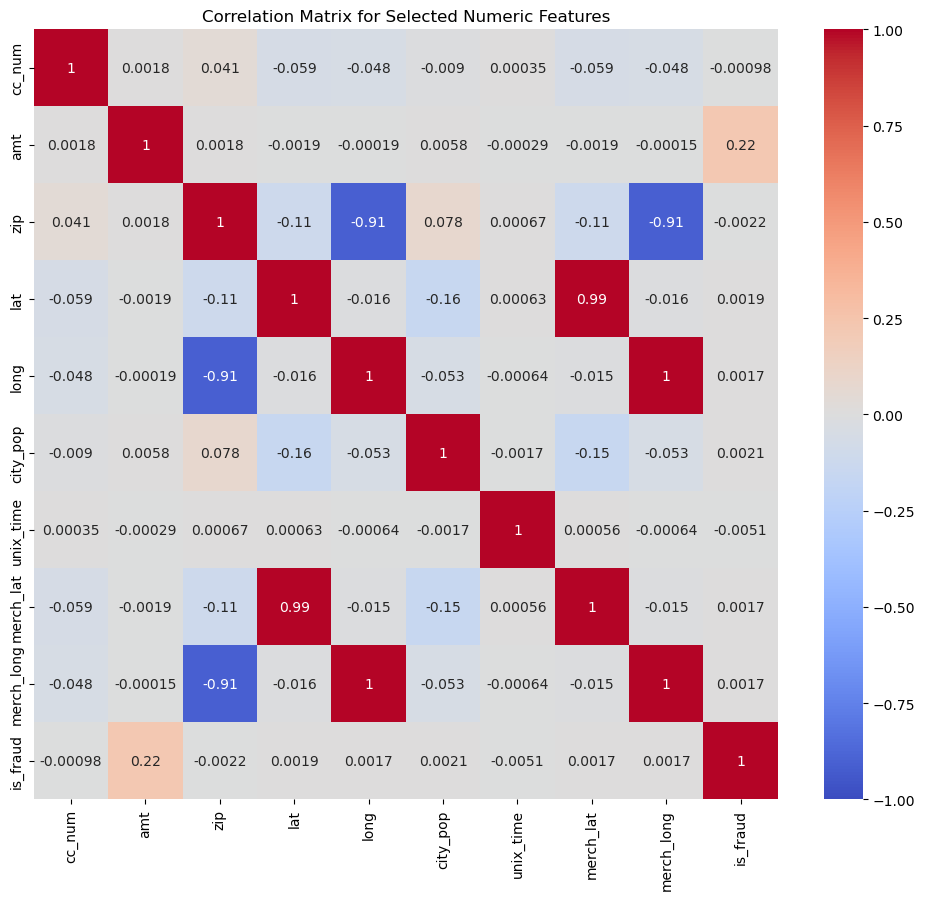

Top Positive Correlations:
cc_num      cc_num        1.0
merch_lat   merch_lat     1.0
unix_time   unix_time     1.0
city_pop    city_pop      1.0
long        long          1.0
lat         lat           1.0
zip         zip           1.0
amt         amt           1.0
merch_long  merch_long    1.0
is_fraud    is_fraud      1.0
dtype: float64

Top Negative Correlations:
long        zip          -0.909732
zip         long         -0.909732
            merch_long   -0.908924
merch_long  zip          -0.908924
lat         city_pop     -0.155730
city_pop    lat          -0.155730
            merch_lat    -0.154781
merch_lat   city_pop     -0.154781
zip         lat          -0.114290
lat         zip          -0.114290
dtype: float64


In [11]:
# Ensure all necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Numeric Features')
plt.show()

# Flatten the correlation matrix and sort the pairs
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort")

# Display the top positive and negative correlations
print("Top Positive Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs > 0].tail(10))  # Display top 10 positive correlations

print("\nTop Negative Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs < 0].head(10))  # Display top 10 negative correlations

#### We can see there is some very positive correlations between the distance features namely "merch_lat", "merch_long", "lat" and "long".
#### "amt", is an important feature
## Analysis
- amt (Amount): Correlation with is_fraud: 0.18
- lat (Latitude): Correlation with is_fraud: 0.0059
- merch_lat (Merchant Latitude): Correlation with is_fraud: 0.0058
- zip (ZIP Code):Correlation with is_fraud: -0.0023
- long (Longitude): Correlation with is_fraud: -0.0021
- cc_num (Credit Card Number):Correlation with is_fraud: -0.0015
- merch_long (Merchant Longitude): Correlation with is_fraud: -0.0011
- city_pop (City Population):Correlation with is_fraud: -0.0049
- unix_time: Correlation with is_fraud: -0.013

#### Focus on amt as an important feature for predicting fraud.
#### Consider dropping features with very weak correlations with is_fraud such as cc_num, zip, lat, long, city_pop, unix_time, merch_lat, and merch_long.
#### Be cautious of multicollinearity between highly correlated features like lat/merch_lat and long/merch_long or zip/long.

# Feature Engineering

## 1. Transaction Frequency Features


In [12]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean      1319.099695
median    1054.000000
min          7.000000
max       3123.000000
Name: count, dtype: float64

In [13]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

             cc_num trans_date  transactions_per_day
0  2703186189652095 2019-01-01                    69
1      630423337322 2019-01-01                    84
2    38859492057661 2019-01-01                    19
3  3534093764340240 2019-01-01                    19
4   375534208663984 2019-01-01                    82


In [14]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2703186189652095     1                    43
1      630423337322     1                    66
2    38859492057661     1                    11
3  3534093764340240     1                     8
4   375534208663984     1                    41


In [15]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
1     104727
2      97657
3     143789
4     134970
5     146875
6     143811
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
dtype: int64


In [16]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2703186189652095 2019-01-01                     177
1      630423337322 2019-01-01                     249
2    38859492057661 2019-01-01                      43
3  3534093764340240 2019-01-01                      35
4   375534208663984 2019-01-01                     170


In [17]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 2. User Transaction Behavior

In [18]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

In [19]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 3. User-Based Features: Age and Gender

In [20]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [21]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)

print(df.dtypes)


 The number of cutomers based on age is:
gender
F    709863
M    586812
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       45.401370    43.0
M       45.612414    44.0
----------------------------------------
trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object

## 4. Fraud Transaction Analysis

In [22]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')


#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']


# Merge the fraud ratio back into the original DataFrame
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')


# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.59%
Credit Card Number 60422928733: 0.78%
Credit Card Number 60423098130: 1.96%
Credit Card Number 60427851591: 2.65%
Credit Card Number 60487002085: 0.00%
Credit Card Number 60490596305: 0.99%
Credit Card Number 60495593109: 0.00%
Credit Card Number 501802953619: 0.45%
Credit Card Number 501818133297: 100.00%
Credit Card Number 501828204849: 1.55%
Credit Card Number 501831082224: 0.78%
Credit Card Number 501851115094: 100.00%
Credit Card Number 501882822387: 0.00%
Credit Card Number 501894933032: 100.00%
Credit Card Number 501899453424: 0.53%
Credit Card Number 502012776709: 0.70%
Credit Card Number 502038091380: 0.57%
Credit Card Number 502049568400: 0.48%
Credit Card Number 503848303379: 0.77%
Credit Card Number 503874407318: 0.35%
Credit Card Number 503886119844: 100.00%
Credit Card Number 560881134780: 1.76%
Credit Card Number 561942763351: 0.64%
Credit Card Number 565399283797: 2

In [23]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [24]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)

Aggregated transaction amounts by city:
                          city        amt
0                      Achille   32485.10
1                      Acworth  202428.03
2                        Adams   30856.91
3                        Afton  146101.84
4                        Akron   39798.32
..                         ...        ...
889                Woods Cross   48657.73
890                  Woodville  111276.82
891  Yellowstone National Park   34303.02
892                    Zaleski  151299.07
893                    Zavalla  107956.91

[894 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK   144623.05
1     AL  2682717.10
2     AR  2342468.83
3     AZ   808325.53
4     CA  4138078.51
5     CO  1090171.31
6     CT   498323.98
7     DC   277115.46
8     DE     4630.44
9     FL  3155191.63
10    GA  1821058.13
11    HI   150985.03
12    IA  1770089.29
13    ID   405151.26
14    IL  3011891.30
15    IN  1896

### Total features (old + new)

In [25]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

# 6. Feature Selection 

#### 6.1 Chi-Square Test

In [26]:
from scipy.stats import chi2_contingency
#List of categorical columns to test
categorical_cols = ['Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud:\n", results_df)

Chi-square test results for categorical features and is_fraud:
                    Feature           Chi2        P-value
0                     Week     921.768273  4.292633e-160
1     transaction_per_week    1906.615198   0.000000e+00
2   transactions_per_month  124405.349893   0.000000e+00
3  transactions_per_season  135966.042786   0.000000e+00


#### 6.2 Correlation Coefficient (Numerical)

In [27]:
# Compute Pearson correlation coefficient
correlation = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
                  'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'is_fraud']].corr()['is_fraud']

print("Pearson correlation coefficients:")
print(correlation)

Pearson correlation coefficients:
transactions_per_day   -0.045901
avg_trans_amount        0.209960
total_trans_amount     -0.045929
med_trans_amount        0.216456
std_trans_amount        0.027645
age                     0.012248
fraud_ratio             0.320614
is_fraud                1.000000
Name: is_fraud, dtype: float64


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your dataset with features and 'is_fraud' as the target
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def select_features(X_train, X_test, y_train, y_test, add=True):
    features = [] if add else list(X_train.columns)
    accuracies = []

    while (add and len(features) < len(X_train.columns)) or (not add and len(features) > 0):
        max_acc = -1
        best_or_worst_feature = None

        for feature in (X_train.columns if add else features):
            current_features = features + [feature] if add else [f for f in features if f != feature]
            clf = LogisticRegression(max_iter=1000, random_state=42)
            clf.fit(X_train[current_features], y_train)
            accuracy = accuracy_score(y_test, clf.predict(X_test[current_features]))

            if accuracy > max_acc:
                max_acc = accuracy
                best_or_worst_feature = feature

        if max_acc > max(accuracies, default=0):
            if add:
                features.append(best_or_worst_feature)
            else:
                features.remove(best_or_worst_feature)
            accuracies.append(max_acc)
        else:
            break

    return features, accuracies

# Feature addition
selected_features_add, accuracies_add = select_features(X_train, X_test, y_train, y_test, add=True)
print("Selected Features (Adding):", selected_features_add)
print("Accuracies (Adding):", accuracies_add)

# Feature removal
selected_features_remove, accuracies_remove = select_features(X_train, X_test, y_train, y_test, add=False)
print("Selected Features (Removing):", selected_features_remove)
print("Accuracies (Removing):", accuracies_remove)

Selected Features (Adding): ['fraud_ratio']
Accuracies (Adding): [0.9946902654867257]
Selected Features (Removing): ['transactions_per_day', 'avg_trans_amount', 'total_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio']
Accuracies (Removing): [0.9946902654867257]


## 7.Resampling Dataset

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])

# Columns to drop
columns_to_drop = ["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "job"]

# Check if columns exist in the DataFrame before dropping them
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop)

# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

print(df.head())  # Print the first few rows of the DataFrame to verify changes

             cc_num  merchant  category     amt  gender  city  state    zip  \
0  2703186189652095       514         8    4.97       0   526     27  28654   
1      630423337322       241         4  107.23       0   612     47  99160   
2    38859492057661       390         0  220.11       1   468     13  83252   
3  3534093764340240       360         2   45.00       1    84     26  59632   
4   375534208663984       297         9   41.96       1   216     45  24433   

       lat      long  ...  Week  transaction_per_week  transactions_per_month  \
0  36.0788  -81.1781  ...     1                    43                     177   
1  48.8878 -118.2105  ...     1                    66                     249   
2  42.1808 -112.2620  ...     1                    11                      43   
3  46.2306 -112.1138  ...     1                     8                      35   
4  38.4207  -79.4629  ...     1                    41                     170   

   transactions_per_season  avg_trans_

In [31]:
print(df.dtypes)

cc_num                       int64
merchant                     int32
category                     int32
amt                        float64
gender                       int64
city                         int32
state                        int32
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
is_fraud                     int64
transactions_per_day         int64
Week                        UInt32
transaction_per_week         int64
transactions_per_month       int64
transactions_per_season      int64
avg_trans_amount           float64
total_trans_amount         float64
med_trans_amount           float64
std_trans_amount           float64
age                          int64
fraud_ratio                float64
dtype: object


In [32]:
# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Ensure all columns are of a compatible data type, particularly float64 where necessary
df = df.astype({col: 'float64' for col in df.columns if df[col].dtype != 'float64'})

## Correlation matrix after feature engineering to see new feature relation with Target

In [33]:
total_columns = df.shape[1]
print(f'Total number of columns: {total_columns}')

# Print all column headers
print("Column headers:")
print(df.columns.tolist())

Total number of columns: 26
Column headers:
['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio']


### 

## Correlation matrix after balancing

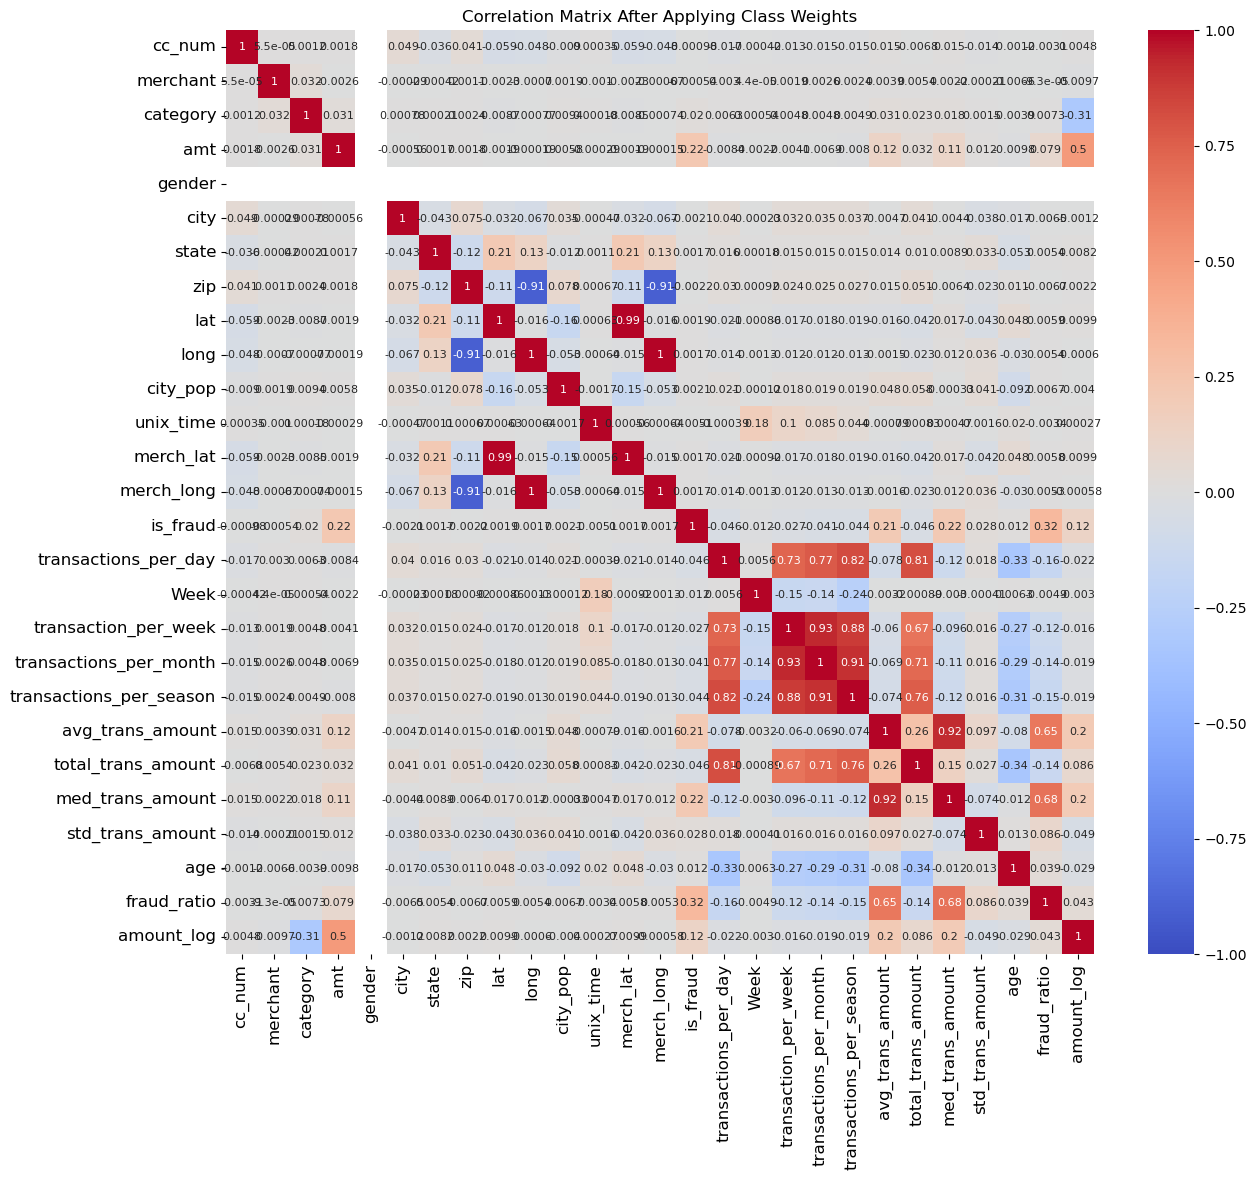

In [34]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Convert 'amt' to numeric if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Create new feature based on transaction amounts
df['amount_log'] = np.log(df['amt'] + 1)


# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df['is_fraud']), y=df['is_fraud'])
class_weights_dict = dict(enumerate(class_weights))

# Optionally, you can use the class weights in your model training process.

# Exclude non-numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))  # Adjusted size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Adjusted font size
plt.title('Correlation Matrix After Applying Class Weights', fontsize=12)
plt.xticks(fontsize=12)  # Adjust x-axis labels font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.show()

# 8 Modelling

#### 8.1 Model with Logistic Regression

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Assuming df is your preprocessed DataFrame

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Logistic Regression
def run_Logit(X_train, X_test, y_train, y_test, class_weight):
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=42,
        max_iter=100,
        n_jobs=-1,
        class_weight=class_weight
    )
    
    logit.fit(X_train, y_train)
    
    # Evaluate on training set
    pred_train = logit.predict_proba(X_train)[:, 1]
    print('Train set roc-auc: {:.2f}'.format(roc_auc_score(y_train, pred_train)))
    
    # Evaluate on testing set
    pred_test = logit.predict_proba(X_test)[:, 1]
    print('Test set roc-auc: {:.2f}'.format(roc_auc_score(y_test, pred_test)))
    
    # Confusion Matrix and Classification Report
    y_test_pred = logit.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    
    print('\nClassification Report:')
    print(classification_report(y_test, y_test_pred))

# Evaluate model without cost-sensitive learning
print("Baseline model (no cost-sensitive learning):")
run_Logit(X_train_scaled, X_test_scaled, y_train, y_test, class_weight=None)

c:\Users\singh\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Baseline model (no cost-sensitive learning):
Train set roc-auc: 0.87
Test set roc-auc: 0.88
Confusion Matrix:
[[257766     49]
 [  1301    219]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    257815
         1.0       0.82      0.14      0.24      1520

    accuracy                           0.99    259335
   macro avg       0.91      0.57      0.62    259335
weighted avg       0.99      0.99      0.99    259335



In [36]:
# Evaluate model with balanced class weights
print("\nModel with balanced class weights:")
run_Logit(X_train_scaled, X_test_scaled, y_train, y_test, class_weight='balanced')


Model with balanced class weights:
Train set roc-auc: 0.93
Test set roc-auc: 0.93
Confusion Matrix:
[[241126  16689]
 [   283   1237]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    257815
         1.0       0.07      0.81      0.13      1520

    accuracy                           0.93    259335
   macro avg       0.53      0.87      0.55    259335
weighted avg       0.99      0.93      0.96    259335



#### Random Forest Model using only balanced dataset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Random Forest Classifier
def run_RandomForest(X_train, X_test, y_train, y_test, class_weight):
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=0,
        n_jobs=4,
        class_weight= class_weight  # weights / cost
    )
    
    rf.fit(X_train, y_train)
    print('Train set')
    pred_train = rf.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    
    print('Test set')
    pred_test = rf.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))

    # Print classification report
    print('\nClassification Report:')
    y_test_pred = rf.predict(X_test)
    print(classification_report(y_test, y_test_pred))

    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

# Call the function to run Random Forest with balanced class weights
print("\nModel with balanced class weights:")
run_RandomForest(X_train_scaled, X_test_scaled, y_train, y_test, class_weight='balanced')

(1037340, 26) (259335, 26) (1037340,) (259335,)


c:\Users\singh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Model with balanced class weights:
Train set
roc-auc: 1.0
Test set
roc-auc: 0.9939701624583929

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    257815
         1.0       0.94      0.74      0.83      1520

    accuracy                           1.00    259335
   macro avg       0.97      0.87      0.91    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
[[257746     69]
 [   391   1129]]


#### Random Forest Model for sample Test

#### Random Forest - Hypertunning

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Assuming df is your DataFrame

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with balanced class weights
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [None, 10, 20],  # Reduced depth options
    'min_samples_split': [2, 5],  # Reduced split options
    'min_samples_leaf': [1, 2],  # Reduced leaf options
    'bootstrap': [True]  # Only use bootstrap samples
}

# K-Fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced number of splits

# Perform Randomized Search with K-Fold Cross-Validation
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=20,  # Reduced number of parameter settings to sample
    cv=kf,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1,  # Number of parallel jobs
    verbose=2  # Verbosity level
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the Random Forest classifier
auprc_rf = average_precision_score(y_test, y_pred_rf)
print(f"\nRandom Forest AUPRC: {auprc_rf:.4f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\singh\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# Save the model
joblib.dump(best_rf, 'best_random_forest_model.joblib')

# Save the model using Joblib
joblib.dump(best_rf, 'my_rf_model.joblib')
print("Model saved as my_rf_model.joblib")

In [ ]:
print(df.dtypes)

cc_num                     float64
merchant                   float64
category                   float64
amt                        float64
gender                     float64
city                       float64
state                      float64
zip                        float64
lat                        float64
long                       float64
city_pop                   float64
unix_time                  float64
merch_lat                  float64
merch_long                 float64
is_fraud                   float64
transactions_per_day       float64
Week                       float64
transaction_per_week       float64
transactions_per_month     float64
transactions_per_season    float64
avg_trans_amount           float64
total_trans_amount         float64
med_trans_amount           float64
std_trans_amount           float64
age                        float64
fraud_ratio                float64
amount_log                 float64
dtype: object
